## Term Project - Biswajit Sharma

### Introduction

Undergraduate and graduate degree programs are challenging. It needs dedication, focus, hardwork and perseverance. Students joining such programs are generally very excited to start a new academic chapter in their life initially. however due to various reasons such as motivational, medical, anxiety, lack of confidence, non alignmnet of curriculum with interests,and guidance. Although most of the students compelte till graduation, there are circumstances when students fall short and drop from the program without graduation. 
Other than medical and other unavidable reasons, it is very detrimental emotionaly and mentally for a students to fail to complete graduation. It also adversely effects college, university, department, skilled job seekers market and potential employers to miss out qualified young generation. Success in  higher education often relies on being motivated, time management, carrer and academic guidance, mentoring, relationship between facylty and students, and scholarshio opportunities.

Lower grades in coursework remains one of main reasons for students to drop out and complete graduation. When students struggle in the classroom, they become stressed and loose motivation and eventually feel lost and increases the potential of drop out before graduation. It is very fruitful to provide holistic support and guidance to students throughout their higher education journey. Hence, it is of utmost importance to identify students who are struggling with coursework early and provide personalized support to adress their academic, social and emotional challenges. Early intervention provides opportunity to identify corrective measures while there is sufficient time to bring back students to the right track of achieving education their goals. Not all students needs same level academic counseling and guidance. It becomes necessary to identify students who are struggling so that advisors can provide right resources and allocate more time to those students increasing their chances of success and retention. High retention rates also helps in managing costs for the university  wich aloows universities to lower the cost of courses and provide more scholarship opportunities. Higher graduation rates also has socio economic impact as it increases the chances to better employment, higher level of income and more contribution to economy. Identification of potential students who are susceptible to low grades early helps educators to adjust their teaching methods, curriculum and strategies to increase the chances of success for all students.

As we have discussed above that predicting students who are at risk of low grades early in their coursework is essential and provide numerous benefits to both students and college or universities.

 - Students Benefit: If students are aware that their current approach to study might not be good enough for getting good scores at the end of coursework, they have still time to focus, get help from counseling and mentoring, allocate more time for study. Students can take help from friends and family to remain motivated. This aloows them to take corrective measures and increases their chanches of success with the coursework. Applying corrective measures will help the students to get back on their success track which will provide them better employment opportunity and higher standards of life.

 - College or University benefits: Predictive analysis can help institutions to identify students who need counseling and support such as advising and mentoring. This will allow the institutions to properly allocate personalized resourses for those students increasing the chances of their success. Higher graduation rates along with personalized student support will attract more students and hence potential for increased revenue. Student success also will aid in increasing retention rates which will have positive impact on revenue. Higher graduation rates, higher retention rates and enriched counseling and guidance support will help in betterment of reputation of the college or university and hence potential for increased student enrollment and growth.

Where data was obtained
describe data
https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation!


The dataset for this study will be referenced from [Higher Education Students Performance Evaluation][1] in UCI Machine Learning Repository (2023).

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("student_data.csv")

In [4]:
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [24]:
df["GRADE"].value_counts()

GRADE
1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: count, dtype: int64

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [11]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    df.iloc[0:, 1:-1], df["GRADE"], test_size=0.2, random_state=0
)

In [15]:
decision_tree = DecisionTreeClassifier(random_state=1)
hyperparameters = {
    "max_depth":[5, 10, 20, 50]
}
gcv = GridSearchCV(
    decision_tree,
    hyperparameters,
    cv=5,
    verbose=1
)

In [26]:
best_model = gcv.fit(df.iloc[0:, 1:-1], df["GRADE"])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [27]:
best_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [30]:
predicted_test = best_model.predict(df.iloc[0:, 1:-1])

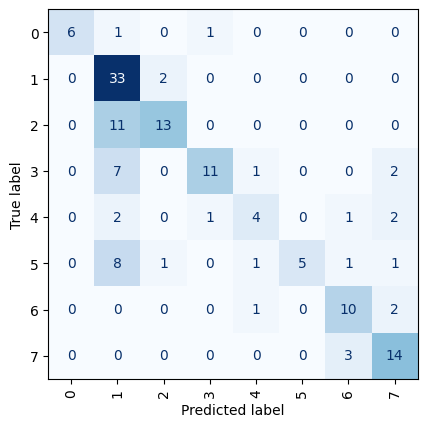

In [32]:
ConfusionMatrixDisplay.from_predictions(df["GRADE"], predicted_test, colorbar=False, cmap="Blues")
plt.xticks(rotation=90)
plt.show()

In [34]:
print(f"Accuracy: {accuracy_score(df['GRADE'], predicted_test)}")
print(f"Recall: {recall_score(df['GRADE'], predicted_test, average='macro')}")
print(f"Precision: {precision_score(df['GRADE'], predicted_test, average='macro')}")
print(f"F1-score: {f1_score(df['GRADE'], predicted_test,average='macro')}")

Accuracy: 0.6620689655172414
Recall: 0.630651395173454
Precision: 0.761959226928985
F1-score: 0.6513594451493416


In [47]:
forest = RandomForestClassifier(random_state=1)
hyperparameters = {
    "n_estimators":[20,50,60]
}
gcv = GridSearchCV(
    forest,
    hyperparameters,
    cv=5,
    verbose=1
)

In [52]:
best_model_forest = gcv.fit(features_train, target_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [53]:
best_model_forest.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 60,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [54]:
predicted_test_forest = best_model_forest.predict(features_test)

In [55]:
print(f"Accuracy: {accuracy_score(target_test, predicted_test_forest)}")
print(f"Recall: {recall_score(target_test, predicted_test_forest, average='macro')}")
print(f"Precision: {precision_score(target_test, predicted_test_forest, average='macro')}")
print(f"F1-score: {f1_score(target_test, predicted_test_forest,average='macro')}")

Accuracy: 0.4827586206896552
Recall: 0.36597222222222225
Precision: 0.37083333333333335
F1-score: 0.3318452380952381


C:\Users\babub\Documents\python\pydata-book\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


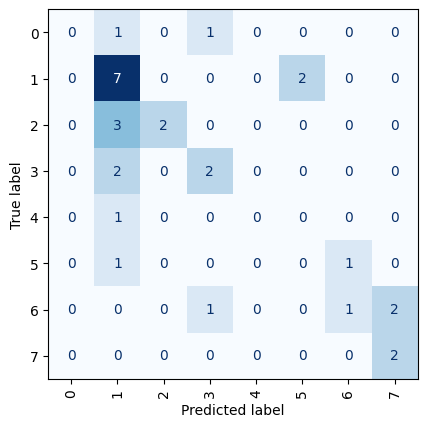

In [57]:
ConfusionMatrixDisplay.from_predictions(target_test, predicted_test_forest, colorbar=False, cmap="Blues")
plt.xticks(rotation=90)
plt.show()

### References

http://helmut.knaust.info/BD/SixMajorReasons.pdf
https://blog.ed.gov/2022/08/the-importance-of-academic-advising-in-higher-education/#:~:text=Advisors%20assist%20in%20monitoring%20academic,major%20policies%20and%20procedures%20better.

Higher Education Students Performance Evaluation (Aug 14 2023)